Logistic Regression Accuracy: 0.8085
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1161
           1       0.77      0.78      0.77       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000

--------------------------------------------------
Random Forest Accuracy: 0.7920
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1161
           1       0.76      0.73      0.75       839

    accuracy                           0.79      2000
   macro avg       0.79      0.78      0.79      2000
weighted avg       0.79      0.79      0.79      2000

--------------------------------------------------


C:\Users\Anura\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:44:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7830
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1161
           1       0.75      0.73      0.74       839

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000

--------------------------------------------------
Support Vector Machine Accuracy: 0.8010
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1161
           1       0.77      0.74      0.76       839

    accuracy                           0.80      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000

--------------------------------------------------
K-Nearest Neighbors Accuracy: 0.7760
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1161
           1       0.74      0.72

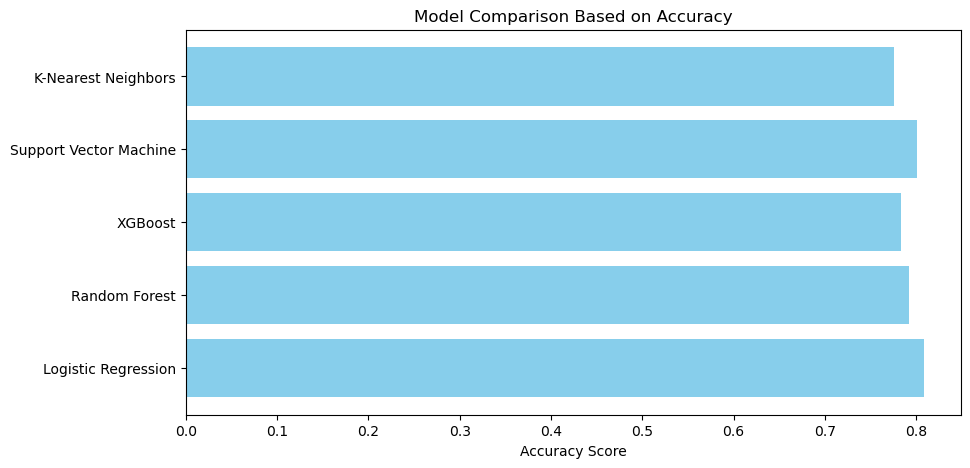

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("placementdata.csv")

# Drop irrelevant column
df.drop(columns=["StudentID"], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df["PlacementStatus"] = label_encoder.fit_transform(df["PlacementStatus"])  # Placed = 1, Not Placed = 0
df["ExtracurricularActivities"] = label_encoder.fit_transform(df["ExtracurricularActivities"])  # Yes = 1, No = 0
df["PlacementTraining"] = label_encoder.fit_transform(df["PlacementTraining"])  # Yes = 1, No = 0

# Feature Scaling (Standardization)
scaler = StandardScaler()
numeric_features = ["CGPA", "AptitudeTestScore", "SoftSkillsRating", "SSC_Marks", "HSC_Marks"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Splitting data into train and test sets
X = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Plot model comparison
plt.figure(figsize=(10, 5))
plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color='skyblue')
plt.xlabel("Accuracy Score")
plt.title("Model Comparison Based on Accuracy")
plt.savefig("conf_matrix.png")
plt.show()